# Tarea 5: Redes de acceso banda ancha

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import descartes
import geopandas as gpd
from shapely.geometry import Point, Polygon

#%matplotlib inline

In [2]:
fileName = 'Comuna.shp'
street_map = gpd.read_file(fileName)

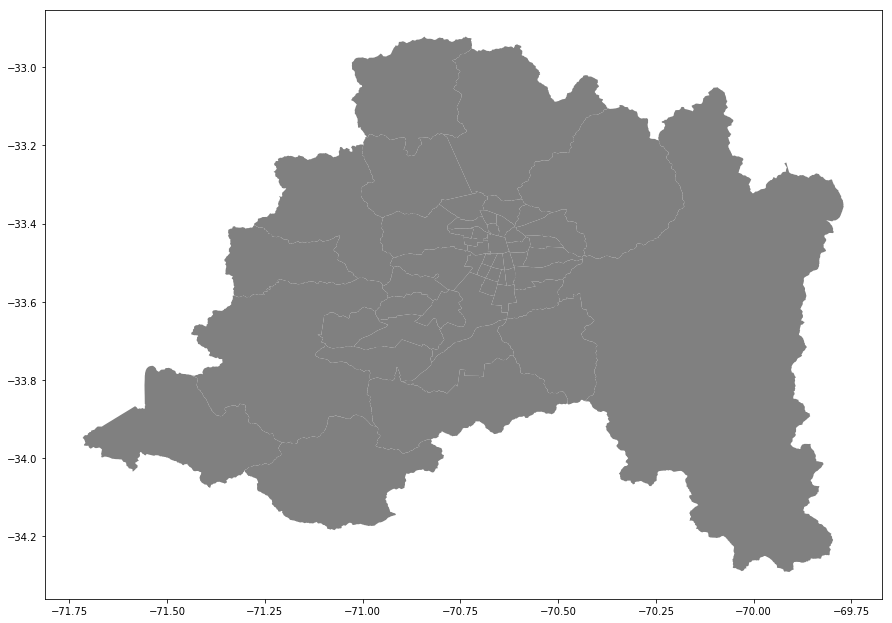

In [3]:
fig,ax = plt.subplots(figsize = (15,15))
street_map.plot(ax = ax, alpha = 1, color = "grey")

In [4]:
datosBS = pd.read_excel('autorizacionBS.xlsx')
datosBS = datosBS[datosBS.Región == 'RM']
crs = {'init:epsg:4326'}
datosBS.head()

,Empresa,Servicio,Tipo Servicio,Sistema,Tipo elemento,Nombre Elemento,Dirección,Comuna,Región,Lat_Grados,Lat_Minutos,Las_Segundos,Lon_Grados,Lon_Minutos,Lon_Segundos,Tipo Documento,Nro. Documento,Fecha Documento
79,ENTEL TELEFONIA MOVIL S.A.,Servicios Públicos,Telefonía Móvil,Red Telefonía Móvil,Estación Base Fija,Plla. S. Antonio,El Monte,El Monte,RM,33,43.0,23.0,70,59.0,56.0,DECRETO NOTIFICADO,146,14/04/1997
80,ENTEL PCS TELECOMUNICACIONES S.A.,Servicios Públicos,Telefonía Móvil,Red Telefonía Móvil,Estación Base Fija,Cuesta La Dormida 2,CERRO LAS CUATRO PALMAS,Til Til,RM,33,2.0,42.0,70,59.0,57.0,DECRETO NOTIFICADO,308,14/04/2008
81,TELEFONICA MOVILES DE CHILE S.A.,Servicios Públicos,Telefonía Móvil,Red Telefonía Móvil,Estación Base Fija,El Monte,Errázuriz N° 251,El Monte,RM,33,40.0,37.0,70,59.0,50.0,DECRETO NOTIFICADO,287,31/05/2006
82,ENTEL TELEFONIA MOVIL S.A.,Servicios Públicos,Telefonía Móvil,Red Telefonía Móvil,Estación Base Fija,Alameda - Tucapel Jimenez Alt. 3,"TORRE LOS HEROES, ALAMEDA Nº 1590",Santiago,RM,33,26.0,30.0,70,59.0,21.0,DECRETO NOTIFICADO,222,18/02/2010
83,CLARO CHILE S.A.,Servicios Públicos,Telefonía Móvil,Red Telefonía Móvil,Estación Base Fija,Cerro Puntilla San Antonio,S/D,Isla de Maipo,RM,33,43.0,21.0,70,59.0,59.0,DECRETO NOTIFICADO,231,12/05/2000


In [5]:
#Agregar columnas asociadas a longitud y latitud
datosBS['Latitude'] = -1 *(datosBS['Lat_Grados'] + datosBS ['Lat_Minutos']/60.0 + datosBS['Las_Segundos']/3600.0)
datosBS['Longitude'] = -1 *(datosBS['Lon_Grados'] + datosBS ['Lon_Minutos']/60.0 + datosBS['Lon_Segundos']/3600.0)

In [6]:
#Puntos en el mapa.
puntos = [Point(xy) for xy in zip(datosBS['Longitude'],datosBS['Latitude'])]
puntos[:3]

In [7]:
geo_df = gpd.GeoDataFrame(datosBS, crs = crs , geometry = puntos)

In [8]:
#Nombres de operadora
nombresOperadoras = geo_df.Empresa.unique()
print(nombresOperadoras)

['ENTEL TELEFONIA MOVIL S.A.' 'ENTEL PCS TELECOMUNICACIONES S.A.'
 'TELEFONICA MOVILES DE CHILE S.A.' 'CLARO CHILE S.A.'
 'TELEFONICA MOVILES CHILE S.A.' 'WOM S.A.' 'VTR MOVIL S.A.'
 'VTR COMUNICACIONES SPA' 'CLARO COMUNICACIONES S.A.'
 'CTC.DE CHILE CELULAR S.A.']


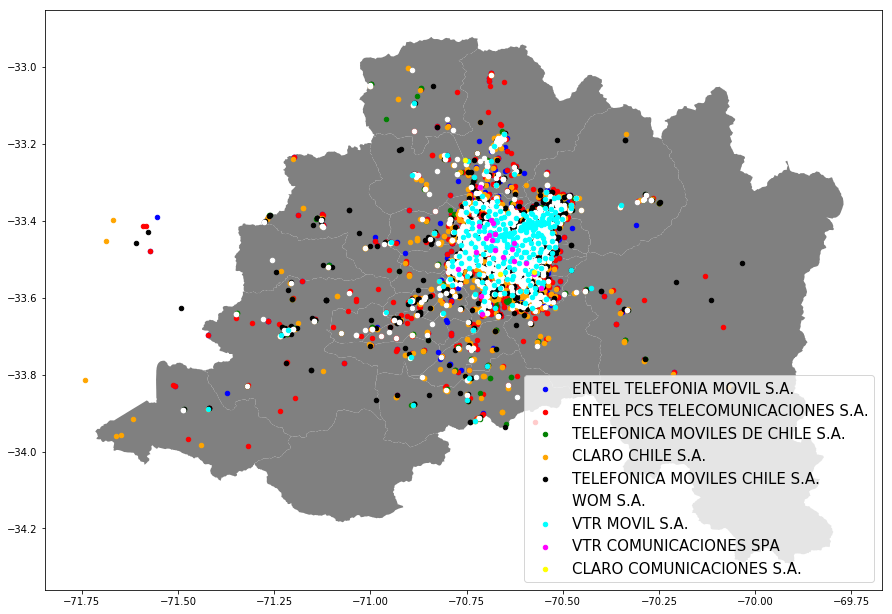

In [10]:
#Grafico
fig,ax = plt.subplots(figsize = (15,15))
street_map.plot(ax=ax, alpha = 1, color = "grey")
geo_df[geo_df.Empresa==nombresOperadoras[0]].plot(ax=ax,markersize=20,color = 'blue', marker = 'o', label = nombresOperadoras[0])
geo_df[geo_df.Empresa==nombresOperadoras[1]].plot(ax=ax,markersize=20,color = 'red', marker = 'o', label = nombresOperadoras[1])
geo_df[geo_df.Empresa==nombresOperadoras[2]].plot(ax=ax,markersize=20,color = 'green', marker = 'o', label = nombresOperadoras[2])
geo_df[geo_df.Empresa==nombresOperadoras[3]].plot(ax=ax,markersize=20,color = 'orange', marker = 'o', label = nombresOperadoras[3])
geo_df[geo_df.Empresa==nombresOperadoras[4]].plot(ax=ax,markersize=20,color = 'black', marker = 'o', label = nombresOperadoras[4])
geo_df[geo_df.Empresa==nombresOperadoras[5]].plot(ax=ax,markersize=20,color = 'white', marker = 'o', label = nombresOperadoras[5])
geo_df[geo_df.Empresa==nombresOperadoras[6]].plot(ax=ax,markersize=20,color = 'cyan', marker = 'o', label = nombresOperadoras[6])
geo_df[geo_df.Empresa==nombresOperadoras[7]].plot(ax=ax,markersize=20,color = 'magenta', marker = 'o', label = nombresOperadoras[7])
geo_df[geo_df.Empresa==nombresOperadoras[8]].plot(ax=ax,markersize=20,color = 'yellow', marker = 'o', label = nombresOperadoras[8])
plt.legend(prop={'size':15})